In [1]:
import sys
sys.path.append('/Mounts/rbg-storage1/users/itamarc/nox')
import nox.utils.loading as loaders
from nox.datasets.gsm_link import GSMReactionEnzymesDataset
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric import utils

IndentationError: expected an indented block (moleculenet.py, line 204)

In [2]:
# a = """--organism_name recon3d --data_dir /Mounts/rbg-storage1/datasets/Metabo/datasets --logger_name wandb --workspace peteranditamar --project_name metabolomics --accumulate_grad_batches 1 --dataset_name gsm_link --lightning_name linker --lr_decay 0.1 --limit_train_batches 1.0 --limit_val_batches 1.0 --model_name metabo_nbfnet --loss_names linkpredictionloss --metric_names ranking_metrics --monitor val_mean_reciprocal_rank --num_workers 8 --optimizer_name adam --patience 5 --train --test --num_sanity_val_steps 0 --val_check_interval 1.0 --gpus 4 --checkpoint_dir /Mounts/rbg-storage1/snapshots/metabolomics --hits_at_n hits@1 hits@3 hits@10 hits@10_50 --activation_func relu --message_func distmult --aggregate_func pna --short_cut --layer_norm --dependent --remove_one_hop --num_mlp_layer 2 --num_beam 10 --path_topk 10 --num_negative 32 --strict_negative --adversarial_temperature 0.5 --rdkit_fingerprint_name rdkit_fingerprint --gat_num_heads 1 --gat_node_dim 9 --gat_edge_dim 3 --gat_num_layers 6 --weight_decay 0 --max_epochs 20 --batch_size 16 --lr 1e-05 --dropout 0.0 --logger_tags recon3d precomputed_protein trained_metabos debug --metabolite_feature_type trained --metabolite_model gatv2 --metabolite_dim 2048 --protein_feature_type precomputed --protein_model linear --protein_dim 1280 --hidden_dims 32 32 32 32 32 32 --gat_hidden_dim 32 --input_dim 32 --strategy ddp_spawn  --results_path /Mounts/rbg-storage1/logs/metabo/7350d636c83b594edea2e5171be086b1 --experiment_name 7350d636c83b594edea2e5171be086b1"""
# print(a.replace(" --", "'\nself.").replace(" ", " = '"))

In [24]:
class Args:
    def __init__(self):
        self.organism_name = 'e_coli_core'
        self.data_dir = '/Mounts/rbg-storage1/datasets/Metabo/datasets'
        self.logger_name = 'wandb'
        self.workspace = 'peteranditamar'
        self.project_name = 'metabolomics'
        self.accumulate_grad_batches = 1
        self.dataset_name = 'gsm_link'
        self.lightning_name = 'linker'
        self.lr_decay = 0.1
        self.limit_train_batches = 1.0
        self.limit_val_batches = 1.0
        self.model_name = 'metabo_nbfnet'
        self.loss_names = 'linkpredictionloss'
        self.metric_names = 'ranking_metrics'
        self.monitor = 'val_mean_reciprocal_rank'
        self.num_workers = 0
        self.optimizer_name = 'adam'
        self.patience = 5
        self.train = True
        self.test = True
        self.num_sanity_val_steps = 0
        self.val_check_interval = 1.0
        self.gpus = 1
        self.checkpoint_dir = '/Mounts/rbg-storage1/snapshots/metabolomics'
        self.hits_at_n = ['hits@1', 'hits@3', 'hits@10','hits@10_50']
        self.activation_func = 'relu'
        self.message_func = 'distmult'
        self.aggregate_func = 'pna'
        self.short_cut = True
        self.layer_norm = True
        self.dependent = True
        self.remove_one_hop = True
        self.num_mlp_layer = 2
        self.num_beam = 10
        self.path_topk = 10
        self.num_negative = 32
        self.strict_negative = True
        self.adversarial_temperature = 0.5
        self.rdkit_fingerprint_name = 'rdkit_fingerprint'
        self.gat_num_heads = 1
        self.gat_node_dim = 9
        self.gat_edge_dim = 3
        self.gat_num_layers = 6
        self.weight_decay = 0
        self.max_epochs = 20
        self.batch_size = 16
        self.lr = 1e-05
        self.dropout = 0.0
        self.logger_tags = ['recon3d', 'precomputed_protein', 'trained_metabos', 'debug']
        self.metabolite_feature_type = 'none'
        self.metabolite_model = 'gatv2'
        self.metabolite_dim = 2048
        self.protein_feature_type = 'none'
        self.protein_model = 'linear'
        self.protein_dim = 1280
        self.hidden_dims = [32, 32, 32, 32, 32, 32]
        self.gat_hidden_dim = 32
        self.input_dim = 32
        self.strategy = 'ddp_spawn'
        self.results_path = '/Mounts/rbg-storage1/logs/metabo/7350d636c83b594edea2e5171be086b1'
        self.experiment_name = '7350d636c83b594edea2e5171be086b1'
        self.protein_encoder_name = 'fair_esm'
        self.pretrained_hub_dir = "/Mounts/rbg-storage1/snapshots/metabolomics"
        self.train_encoder = False
        self.class_bal = False
        self.split_probs = [0.6, 0.2, 0.2]
        self.split_seed = 0
        self.simple_graph = True # this removes bidirections

In [25]:
args = Args()

In [26]:
train_dataset = loaders.get_train_dataset_loader(args)

Processing...
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 4746.71it/s]


Skipping reaction EX_akg_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_etoh_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_fum_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_glc__D_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_glu__L_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_mal__L_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_nh4_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_pyr_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_pi_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_fru_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_lac__D_e, 1 reactants, 0 products and 0 proteins


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 8851.99it/s]


Skipping reaction EX_ac_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_co2_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_for_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_h_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_o2_e, 1 reactants, 0 products and 0 proteins


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 9657.27it/s]


Skipping reaction EX_acald_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_gln__L_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_h2o_e, 1 reactants, 0 products and 0 proteins
Skipping reaction EX_succ_e, 1 reactants, 0 products and 0 proteins


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 208/208 [00:00<00:00, 37594.38it/s]
Done!


TRAIN DATASET CREATED FOR GSM_LINK
Containing 2108 triplets and 208 number of nodes in the split graph


In [30]:
G = utils.to_networkx(
    train_dataset.dataset.split_graph,
    node_attrs=None, 
    edge_attrs=None, 
    # graph_attrs=None, 
    to_undirected=False, 
    remove_self_loops=True)

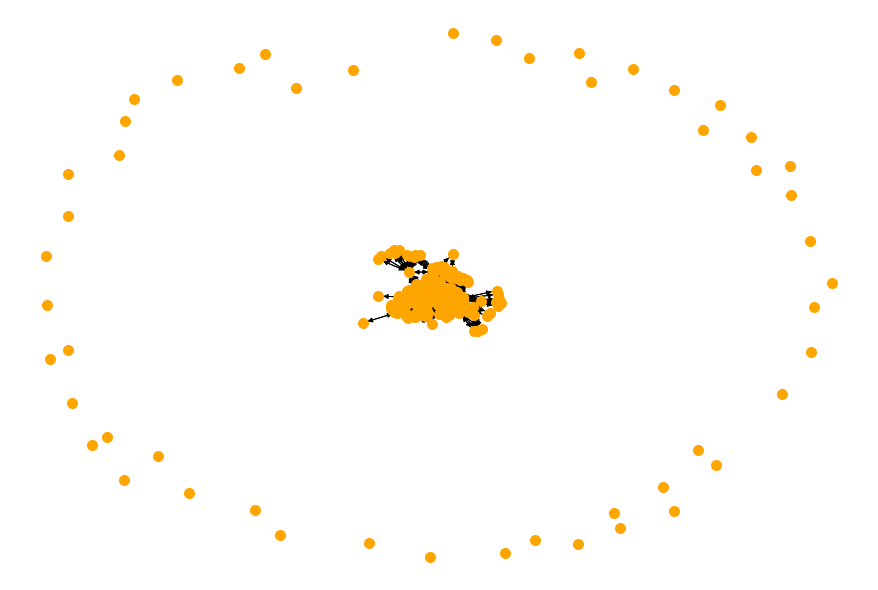

In [36]:
# too big to plot recon3d
options = {
    'node_color': 'orange',
    'node_size': 100,
    'width': 1,
}
fig=plt.figure(figsize=(12,8))
nx.draw(G, **options)

In [37]:
len(G)

208

In [31]:
x

(0, 1)
(1, 0)
(1, 35)
(1, 37)
(1, 38)
(1, 14)
(1, 8)
(1, 34)
(1, 111)
(1, 1575)
(35, 36)
